# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [79]:
import numpy as np
import pandas as pd

In [67]:
sales = [3505,2400,3027,2798,3700,3250,2689]

In [43]:
def mean(sales):
    counter = 0
    s = 0
    for sale in sales:
        s += sale
        counter+=1
    return (s / counter), counter, s

In [45]:
def variance(sales):
    m = mean(sales)[0]
    n = mean(sales)[1]
    var = 0
    for sale in sales:
        var += ((sale - m)**2)
    var = var / n
    return var

In [49]:
def std(sales):
    return variance(sales)**.5

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [93]:
sales = np.array([3505,2400,3027,2798,3700,3250,2689])

In [94]:
customers = np.array([127,80,105,92,120,115,93])

In [111]:
covariance = np.cov([sales,customers])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [112]:
covariance = pd.DataFrame(covariance)

In [113]:
covariance

,0,1
0,214387.904762,7604.357143
1,7604.357143,290.952381


In [114]:
np.std(customers)

15.792015549069118

In [115]:
np.std(sales)

428.67360686714756

In [116]:
(np.std(customers) * np.std(sales))

6769.620265121536

In [117]:
covariance / (np.std(customers) * np.std(sales))

,0,1
0,31.669118,1.123306
1,1.123306,0.042979


In [118]:
np.corrcoef(sales,customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [119]:
covariance.corr()

,0,1
0,1.0,1.0
1,1.0,1.0


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [125]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [131]:
df = df[df.describe().columns]

In [133]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [134]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [136]:
import matplotlib.pyplot as plt

In [135]:
v1 = [0,1]
v2 = [1,0]

(-5, 5)

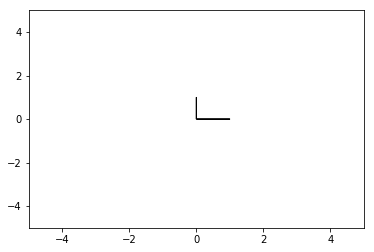

In [143]:
plt.arrow(0,0,v1[0],v1[1])
plt.arrow(0,0,v2[0],v2[1])
plt.xlim(-5,5)
plt.ylim(-5,5)

In [144]:
# perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [145]:
a=[-5,3,7]
b=[6,-8,2]

In [146]:
np.dot(a,b)

-40

In [147]:
# no because their dot product is not zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [148]:
c = np.array([2,-15,6,20])

In [150]:
np.linalg.norm(c)**2

665.0

In [151]:
np.dot(c,c)

665

In [158]:
np.multiply(c.transpose(), c)

array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}


\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{j}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [120]:
f = [4,12,11,9,2]

In [123]:
t = f / np.linalg.norm(f)

In [124]:
np.linalg.norm(t)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [166]:
d1 = np.array([1,2])
d2 = np.array([4,8])

In [163]:
v1 = np.array([2,9])
v2 = np.array([1,4])

(0, 10)

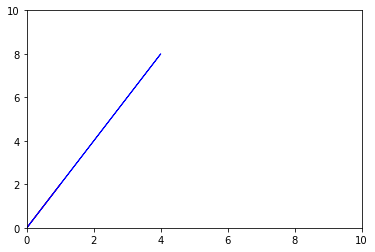

In [170]:
plt.arrow(0,0,d1[0],d1[1],color='r')
plt.arrow(0,0,d2[0],d2[1],color='b')
plt.xlim(0,10)
plt.ylim(0,10)

(0, 10)

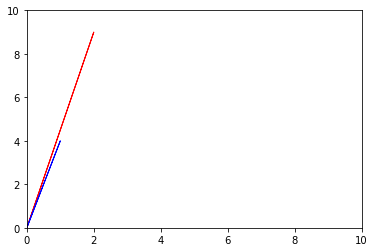

In [171]:
plt.arrow(0,0,v1[0],v1[1],color='r')
plt.arrow(0,0,v2[0],v2[1],color='b')
plt.xlim(0,10)
plt.ylim(0,10)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [159]:
g = np.array([1,2])
h = np.array([4,8])

In [160]:
# R1 since they are linear dependent

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [172]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

In [174]:
mat = np.matrix([l,m,n])

In [176]:
np.rank(mat)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  """Entry point for launching an IPython kernel.


2

In [177]:
# R2

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [180]:
v1 = np.array([1,0])
v2 = np.array([0,1])


(-5, 5)

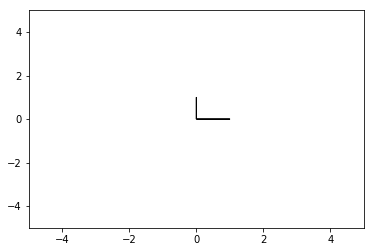

In [181]:
plt.arrow(0,0,v1[0],v1[1])
plt.arrow(0,0,v2[0],v2[1])
plt.xlim(-5,5)
plt.ylim(-5,5)

## 6.2 What does it mean to form a basis?

The basis of a vector space  𝑉  is a set of vectors that are linearly independent and that span the vector space  𝑉 .

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [182]:
p = np.matrix([[1,2,3],[-1,0,7],[4,8,2]])

In [185]:
np.rank(p)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  """Entry point for launching an IPython kernel.


2

## 7.2 What does the rank of a matrix tell us?

That this matrix only spans R2 and that one of these row vectors are linear dependent with each other

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [186]:
v=np.array([1,3])
w = np.array([-1,2])

In [187]:
proj = ((np.dot(v,w)) / (np.linalg.norm(v)**2)) * v

In [189]:
proj

array([0.5, 1.5])

(-5, 5)

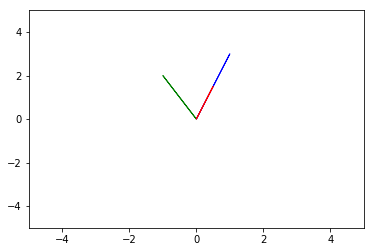

In [193]:
plt.arrow(0,0,v[0],v[1],color='b')
plt.arrow(0,0,w[0],w[1],color='g')
plt.arrow(0,0,proj[0],proj[1],color='r')
plt.xlim(-5,5)
plt.ylim(-5,5)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

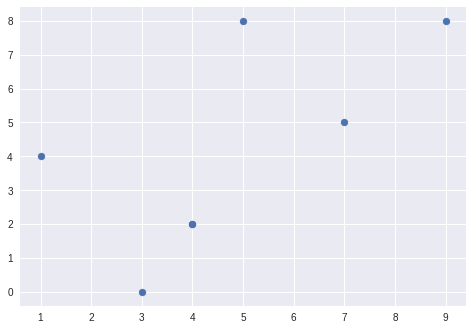

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()